Based on the paper


Iteration 1 - Diagnosis for Paul:
  Viral Fever:
    Membership: 0.40
    Non-membership: 0.10
    SR: 0.00
  Malaria:
    Membership: 0.70
    Non-membership: 0.10
    SR: -0.60
  Typhoid:
    Membership: 0.30
    Non-membership: 0.30
    SR: -0.20
  Stomach problem:
    Membership: 0.10
    Non-membership: 0.70
    SR: -0.60
  Heart problem:
    Membership: 0.10
    Non-membership: 0.80
    SR: -0.80

Iteration 1 - Diagnosis for Jadu:
  Viral Fever:
    Membership: 0.30
    Non-membership: 0.50
    SR: -0.60
  Malaria:
    Membership: 0.20
    Non-membership: 0.60
    SR: -0.60
  Typhoid:
    Membership: 0.60
    Non-membership: 0.10
    SR: -0.40
  Stomach problem:
    Membership: 0.20
    Non-membership: 0.40
    SR: -0.20
  Heart problem:
    Membership: 0.00
    Non-membership: 0.80
    SR: -0.60

Iteration 1 - Diagnosis for Kundu:
  Viral Fever:
    Membership: 0.10
    Non-membership: 0.70
    SR: -0.60
  Malaria:
    Membership: 0.00
    Non-membership: 0.90
    SR: -0.80
  T

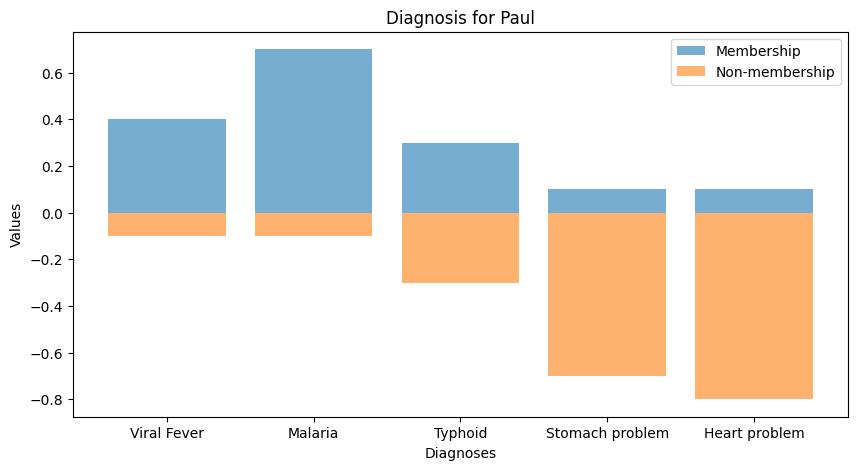

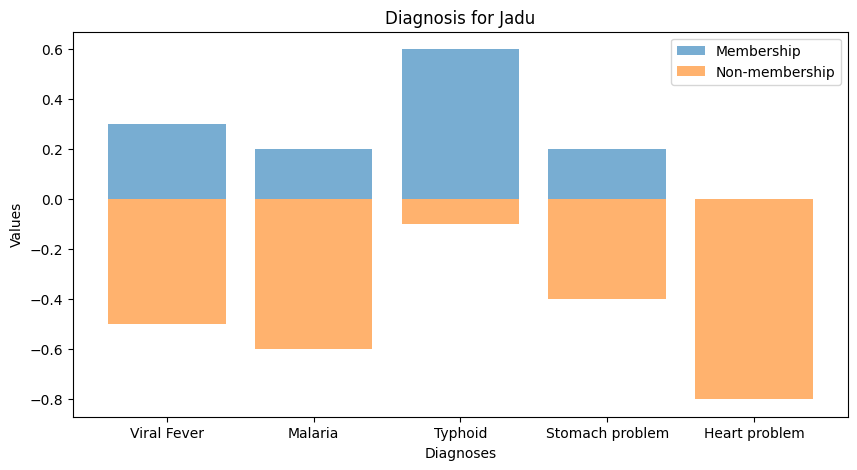

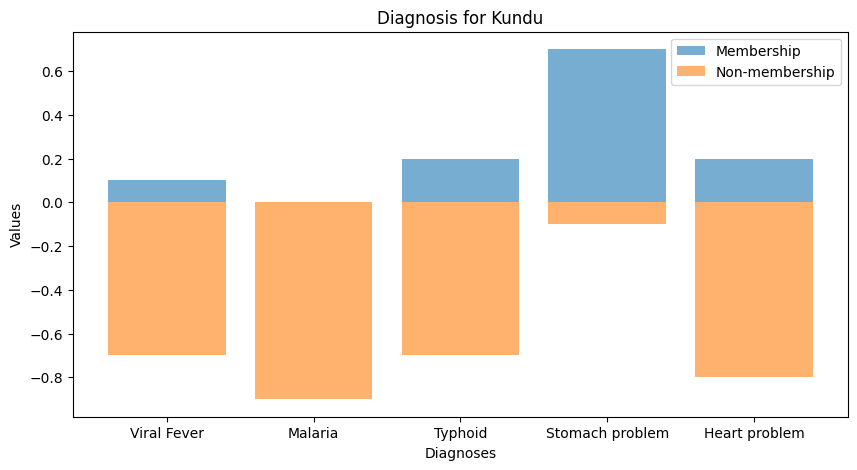

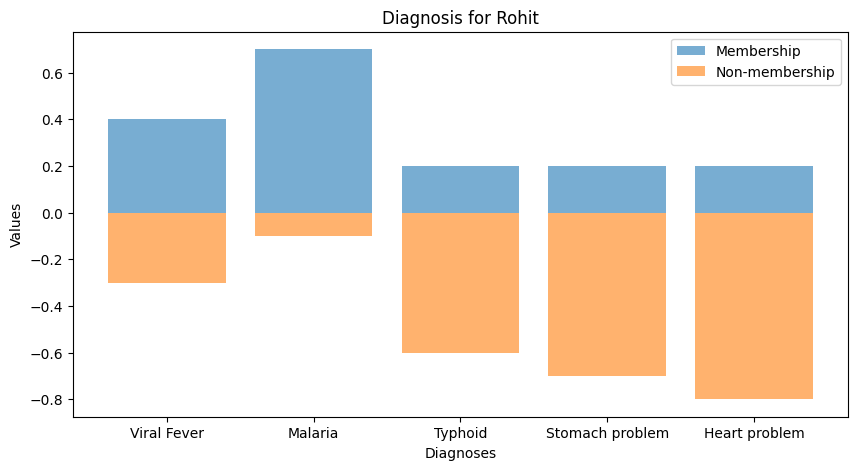

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def max_min_max_composition(A, R):
    """
    Max-min-max composition of an IFS A with an IFR R.
    """
    B_membership = np.max(np.minimum(A[0][:, None], R[0]), axis=0)
    B_non_membership = np.min(np.maximum(A[1][:, None], R[1]), axis=0)
    return B_membership, B_non_membership

def calculate_SR(R):
    """
    Calculate SR as described in the paper.
    """
    membership_diff = 1 - (R[0] + R[1])
    non_membership_diff = 1 - membership_diff
    return membership_diff - non_membership_diff

def refine_R(Q, T, R):
    """
    Refine R based on Q and T.
    """
    refined_R_membership = np.max(np.minimum(Q[0][:, None], T[0]), axis=0)
    refined_R_non_membership = np.min(np.maximum(Q[1][:, None], T[1]), axis=0)
    return refined_R_membership, refined_R_non_membership

def plot_diagnosis(patients, diagnoses, T_membership, T_non_membership, SR):
    """
    Plot the diagnosis results.
    """
    for i, patient in enumerate(patients):
        plt.figure(figsize=(10, 5))
        plt.bar(diagnoses, T_membership[i], alpha=0.6, label='Membership')
        plt.bar(diagnoses, -T_non_membership[i], alpha=0.6, label='Non-membership')
        plt.title(f'Diagnosis for {patient}')
        plt.xlabel('Diagnoses')
        plt.ylabel('Values')
        plt.legend()
        plt.show()

def diagnose_patients(patients, symptoms, diagnoses, Q_membership, Q_non_membership, R_membership, R_non_membership, iterations=1):
    """
    Diagnose patients using intuitionistic fuzzy relations.
    """
    for iteration in range(iterations):
        # Calculate the composition T = R ◦ Q
        T_membership, T_non_membership = max_min_max_composition((Q_membership, Q_non_membership), (R_membership, R_non_membership))

        # Calculate SR values
        SR = calculate_SR((T_membership, T_non_membership))

        # Output the diagnosis results
        for i, patient in enumerate(patients):
            print(f"\nIteration {iteration+1} - Diagnosis for {patient}:")
            for j, diagnosis in enumerate(diagnoses):
                print(f"  {diagnosis}:")
                print(f"    Membership: {T_membership[i, j]:.2f}")
                print(f"    Non-membership: {T_non_membership[i, j]:.2f}")
                print(f"    SR: {SR[i, j]:.2f}")

        # Refine R if necessary
        R_membership, R_non_membership = refine_R((Q_membership, Q_non_membership), (T_membership, T_non_membership), (R_membership, R_non_membership))

    # Plot the diagnosis results
    plot_diagnosis(patients, diagnoses, T_membership, T_non_membership, SR)

# Example data for patients' symptoms and diagnoses
patients = ["Paul", "Jadu", "Kundu", "Rohit"]
symptoms = ["Temperature", "Headache", "Stomach pain", "Cough", "Chest pain"]
diagnoses = ["Viral Fever", "Malaria", "Typhoid", "Stomach problem", "Heart problem"]

# Membership and non-membership degrees for symptoms (Q)
Q_membership = np.array([
    [0.8, 0.6, 0.2, 0.6, 0.1],  # Paul
    [0.0, 0.4, 0.6, 0.1, 0.1],  # Jadu
    [0.8, 0.8, 0.0, 0.2, 0.0],  # Kundu
    [0.6, 0.5, 0.3, 0.7, 0.3]   # Rohit
])
Q_non_membership = np.array([
    [0.1, 0.1, 0.8, 0.1, 0.6],  # Paul
    [0.8, 0.4, 0.1, 0.7, 0.8],  # Jadu
    [0.1, 0.1, 0.6, 0.7, 0.5],  # Kundu
    [0.1, 0.4, 0.4, 0.2, 0.4]   # Rohit
])

# Membership and non-membership degrees for diagnoses (R)
R_membership = np.array([
    [0.4, 0.7, 0.3, 0.1, 0.1],  # Temperature
    [0.3, 0.2, 0.6, 0.2, 0.0],  # Headache
    [0.1, 0.0, 0.2, 0.8, 0.2],  # Stomach pain
    [0.4, 0.7, 0.2, 0.2, 0.2],  # Cough
    [0.1, 0.1, 0.1, 0.2, 0.8]   # Chest pain
])
R_non_membership = np.array([
    [0.0, 0.0, 0.3, 0.7, 0.8],  # Temperature
    [0.5, 0.6, 0.1, 0.4, 0.8],  # Headache
    [0.7, 0.9, 0.7, 0.0, 0.8],  # Stomach pain
    [0.3, 0.0, 0.6, 0.7, 0.8],  # Cough
    [0.7, 0.8, 0.9, 0.7, 0.1]   # Chest pain
])

# Diagnose the patients with multiple iterations for refinement
diagnose_patients(patients, symptoms, diagnoses, Q_membership, Q_non_membership, R_membership, R_non_membership, iterations=3)


Derivate from the paper

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import json
import logging
import csv
import plotly.graph_objs as go
import plotly.io as pio

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', filename='diagnosis.log', filemode='w')

class MedicalDiagnosisCLI:
    def __init__(self):
        self.patients = []
        self.symptoms = ["Temperature", "Headache", "Stomach pain", "Cough", "Chest pain"]
        self.diagnoses = ["Viral Fever", "Malaria", "Typhoid", "Stomach problem", "Heart problem"]

        self.Q_membership = []
        self.Q_non_membership = []
        self.R_membership = np.random.rand(len(self.symptoms), len(self.diagnoses))
        self.R_non_membership = np.random.rand(len(self.symptoms), len(self.diagnoses))

        logging.info("MedicalDiagnosisCLI initialized.")

    def add_patient(self, name, symptoms):
        self.patients.append(name)
        self.Q_membership.append(symptoms)
        self.Q_non_membership.append([1-s for s in symptoms])
        logging.info(f"Added patient: {name} with symptoms {symptoms}")

    def max_min_max_composition(self, A, R):
        B_membership = np.max(np.minimum(A[0][:, None], R[0]), axis=0)
        B_non_membership = np.min(np.maximum(A[1][:, None], R[1]), axis=0)
        return B_membership, B_non_membership

    def calculate_SR(self, R):
        membership_diff = 1 - (R[0] + R[1])
        non_membership_diff = 1 - membership_diff
        return membership_diff - non_membership_diff

    def refine_R(self, Q, T, R):
        refined_R_membership = np.max(np.minimum(Q[0][:, None], T[0]), axis=0)
        refined_R_non_membership = np.min(np.maximum(Q[1][:, None], T[1]), axis=0)
        return refined_R_membership, refined_R_non_membership

    def plot_diagnosis(self, patients, diagnoses, T_membership, T_non_membership, SR):
        for i, patient in enumerate(patients):
            plt.figure(figsize=(10, 5))
            plt.bar(diagnoses, T_membership[i], alpha=0.6, label='Membership')
            plt.bar(diagnoses, -T_non_membership[i], alpha=0.6, label='Non-membership')
            plt.title(f'Diagnosis for {patient}')
            plt.xlabel('Diagnoses')
            plt.ylabel('Values')
            plt.legend()
            plt.show()

        # Plot heatmaps for membership and non-membership values
        fig_membership = go.Figure(data=go.Heatmap(z=T_membership, x=diagnoses, y=patients, colorscale='Viridis'))
        fig_membership.update_layout(title='Membership Values Heatmap', xaxis_title='Diagnoses', yaxis_title='Patients')
        fig_membership.show()

        fig_non_membership = go.Figure(data=go.Heatmap(z=T_non_membership, x=diagnoses, y=patients, colorscale='Viridis'))
        fig_non_membership.update_layout(title='Non-Membership Values Heatmap', xaxis_title='Diagnoses', yaxis_title='Patients')
        fig_non_membership.show()

    def diagnose_patients(self):
        Q_membership = np.array(self.Q_membership)
        Q_non_membership = np.array(self.Q_non_membership)

        iterations = 3
        for iteration in range(iterations):
            T_membership, T_non_membership = self.max_min_max_composition((Q_membership, Q_non_membership), (self.R_membership, self.R_non_membership))
            SR = self.calculate_SR((T_membership, T_non_membership))

            logging.info(f"Iteration {iteration+1} results:")
            print(f"\nIteration {iteration+1}:\n")
            for i, patient in enumerate(self.patients):
                print(f"\nDiagnosis for {patient}:\n")
                for j, diagnosis in enumerate(self.diagnoses):
                    print(f"  {diagnosis}:")
                    print(f"    Membership: {T_membership[i, j]:.2f}")
                    print(f"    Non-membership: {T_non_membership[i, j]:.2f}")
                    print(f"    SR: {SR[i, j]:.2f}")
                    logging.info(f"Patient: {patient}, Diagnosis: {diagnosis}, Membership: {T_membership[i, j]:.2f}, Non-membership: {T_non_membership[i, j]:.2f}, SR: {SR[i, j]:.2f}")

            self.R_membership, self.R_non_membership = self.refine_R((Q_membership, Q_non_membership), (T_membership, T_non_membership), (self.R_membership, self.R_non_membership))

        self.plot_diagnosis(self.patients, self.diagnoses, T_membership, T_non_membership, SR)

    def save_data(self, file_path):
        data = {
            "patients": self.patients,
            "symptoms": self.symptoms,
            "diagnoses": self.diagnoses,
            "Q_membership": self.Q_membership,
            "Q_non_membership": self.Q_non_membership,
            "R_membership": self.R_membership.tolist(),
            "R_non_membership": self.R_non_membership.tolist()
        }

        with open(file_path, 'w') as f:
            json.dump(data, f)

        print("Data saved successfully.")
        logging.info(f"Data saved to {file_path}.")

    def load_data(self, file_path):
        with open(file_path, 'r') as f:
            data = json.load(f)

        self.patients = data["patients"]
        self.symptoms = data["symptoms"]
        self.diagnoses = data["diagnoses"]
        self.Q_membership = data["Q_membership"]
        self.Q_non_membership = data["Q_non_membership"]
        self.R_membership = np.array(data["R_membership"])
        self.R_non_membership = np.array(data["R_non_membership"])

        print("Data loaded successfully.")
        logging.info(f"Data loaded from {file_path}.")

    def export_results_to_csv(self, T_membership, T_non_membership, SR, file_path):
        with open(file_path, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Patient", "Diagnosis", "Membership", "Non-membership", "SR"])
            for i, patient in enumerate(self.patients):
                for j, diagnosis in enumerate(self.diagnoses):
                    writer.writerow([patient, diagnosis, T_membership[i, j], T_non_membership[i, j], SR[i, j]])
        print(f"Results exported to {file_path}.")
        logging.info(f"Results exported to {file_path}.")

def main():
    app = MedicalDiagnosisCLI()

    while True:
        print("\nMenu:")
        print("1. Add Patient")
        print("2. Diagnose Patients")
        print("3. Save Data")
        print("4. Load Data")
        print("5. Export Results to CSV")
        print("6. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            name = input("Enter patient's name: ")
            symptoms = []
            for symptom in app.symptoms:
                while True:
                    try:
                        value = float(input(f"Enter value for {symptom} (0-1): "))
                        if 0 <= value <= 1:
                            symptoms.append(value)
                            break
                        else:
                            print("Value must be between 0 and 1.")
                    except ValueError:
                        print("Invalid input. Please enter a number between 0 and 1.")
            app.add_patient(name, symptoms)
        elif choice == '2':
            app.diagnose_patients()
        elif choice == '3':
            file_path = input("Enter file path to save data: ")
            app.save_data(file_path)
        elif choice == '4':
            file_path = input("Enter file path to load data: ")
            app.load_data(file_path)
        elif choice == '5':
            file_path = input("Enter file path to export results to CSV: ")
            Q_membership = np.array(app.Q_membership)
            Q_non_membership = np.array(app.Q_non_membership)
            T_membership, T_non_membership = app.max_min_max_composition((Q_membership, Q_non_membership), (app.R_membership, app.R_non_membership))
            SR = app.calculate_SR((T_membership, T_non_membership))
            app.export_results_to_csv(T_membership, T_non_membership, SR, file_path)
        elif choice == '6':
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()



Menu:
1. Add Patient
2. Diagnose Patients
3. Save Data
4. Load Data
5. Export Results to CSV
6. Exit
Enter your choice: 6



Menu:
1. Add Patient
2. Diagnose Patients
3. Save Data
4. Load Data
5. Export Results to CSV
6. Exit
Enter your choice: 1
Enter patient's name: Aron
Enter value for Fever (°C) (36-41 °C): 37
Enter value for Headache (0-1): 1
Enter value for Stomach pain (0-1): 1
Enter value for Cough (0-1): 1
Enter value for Chest pain (0-1): 1

Menu:
1. Add Patient
2. Diagnose Patients
3. Save Data
4. Load Data
5. Export Results to CSV
6. Exit
Enter your choice: 1
Enter patient's name: Andrei
Enter value for Fever (°C) (36-41 °C): 2
Value must be between 36 and 41.
Enter value for Fever (°C) (36-41 °C): 6
Value must be between 36 and 41.
Enter value for Fever (°C) (36-41 °C): 41
Enter value for Headache (0-1): 1
Enter value for Stomach pain (0-1): 1
Enter value for Cough (0-1): 1
Enter value for Chest pain (0-1): 1

Menu:
1. Add Patient
2. Diagnose Patients
3. Save Data
4. Load Data
5. Export Results to CSV
6. Exit
Enter your choice: 2

Iteration 1:


Diagnosis for Aron:

  Viral Fever:
    Membershi

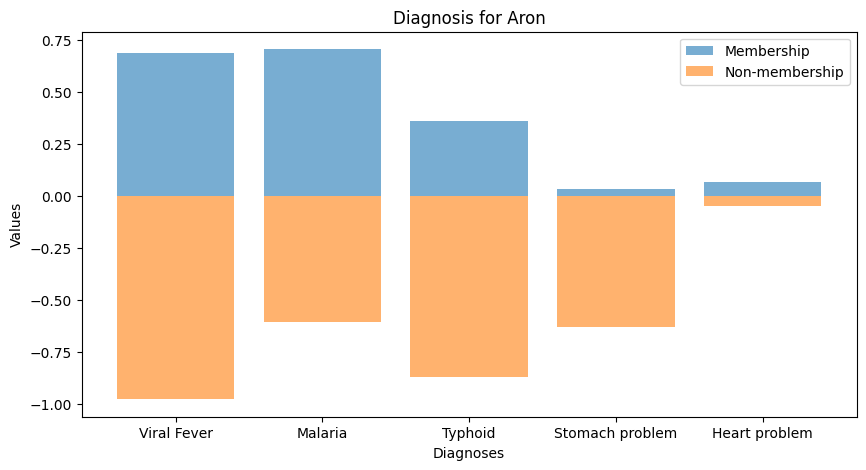

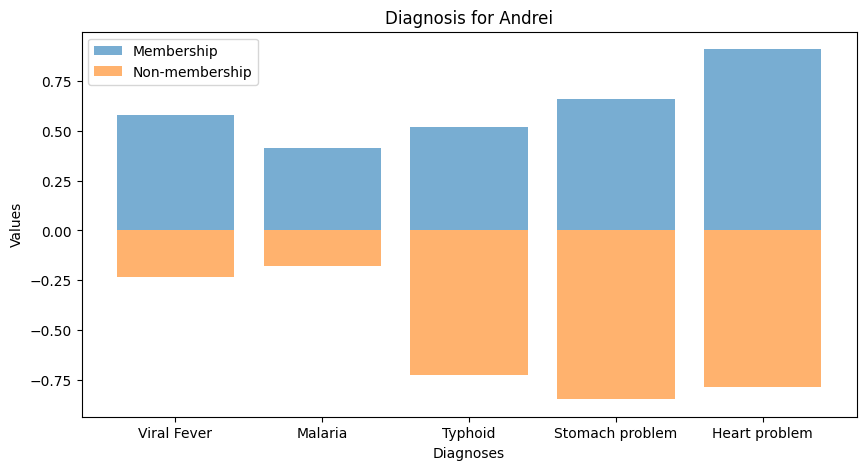


Menu:
1. Add Patient
2. Diagnose Patients
3. Save Data
4. Load Data
5. Export Results to CSV
6. Exit


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import logging
import csv
import plotly.graph_objs as go

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', filename='diagnosis.log', filemode='w')

class MedicalDiagnosisCLI:
    def __init__(self):
        self.patients = []
        self.symptoms = ["Fever (°C)", "Headache", "Stomach pain", "Cough", "Chest pain"]
        self.diagnoses = ["Viral Fever", "Malaria", "Typhoid", "Stomach problem", "Heart problem"]

        self.Q_membership = []
        self.Q_non_membership = []
        self.R_membership = np.random.rand(len(self.symptoms), len(self.diagnoses))
        self.R_non_membership = np.random.rand(len(self.symptoms), len(self.diagnoses))

        logging.info("MedicalDiagnosisCLI initialized.")

    def normalize(self, value, min_value, max_value):
        """
        Normalize a real-world value to the range [0, 1].
        """
        return (value - min_value) / (max_value - min_value)

    def add_patient(self, name, symptoms):
        self.patients.append(name)
        self.Q_membership.append(symptoms)
        self.Q_non_membership.append([1-s for s in symptoms])
        logging.info(f"Added patient: {name} with symptoms {symptoms}")

    def max_min_max_composition(self, A, R):
        B_membership = np.max(np.minimum(A[0][:, None], R[0]), axis=0)
        B_non_membership = np.min(np.maximum(A[1][:, None], R[1]), axis=0)
        return B_membership, B_non_membership

    def calculate_SR(self, R):
        membership_diff = 1 - (R[0] + R[1])
        non_membership_diff = 1 - membership_diff
        return membership_diff - non_membership_diff

    def refine_R(self, Q, T, R):
        refined_R_membership = np.max(np.minimum(Q[0][:, None], T[0]), axis=0)
        refined_R_non_membership = np.min(np.maximum(Q[1][:, None], T[1]), axis=0)
        return refined_R_membership, refined_R_non_membership

    def plot_diagnosis(self, patients, diagnoses, T_membership, T_non_membership, SR):
        for i, patient in enumerate(patients):
            plt.figure(figsize=(10, 5))
            plt.bar(diagnoses, T_membership[i], alpha=0.6, label='Membership')
            plt.bar(diagnoses, -T_non_membership[i], alpha=0.6, label='Non-membership')
            plt.title(f'Diagnosis for {patient}')
            plt.xlabel('Diagnoses')
            plt.ylabel('Values')
            plt.legend()
            plt.show()

        # Plot heatmaps for membership and non-membership values
        fig_membership = go.Figure(data=go.Heatmap(z=T_membership, x=diagnoses, y=patients, colorscale='Viridis'))
        fig_membership.update_layout(title='Membership Values Heatmap', xaxis_title='Diagnoses', yaxis_title='Patients')
        fig_membership.show()

        fig_non_membership = go.Figure(data=go.Heatmap(z=T_non_membership, x=diagnoses, y=patients, colorscale='Viridis'))
        fig_non_membership.update_layout(title='Non-Membership Values Heatmap', xaxis_title='Diagnoses', yaxis_title='Patients')
        fig_non_membership.show()

    def diagnose_patients(self):
        Q_membership = np.array(self.Q_membership)
        Q_non_membership = np.array(self.Q_non_membership)

        iterations = 3
        for iteration in range(iterations):
            T_membership, T_non_membership = self.max_min_max_composition((Q_membership, Q_non_membership), (self.R_membership, self.R_non_membership))
            SR = self.calculate_SR((T_membership, T_non_membership))

            logging.info(f"Iteration {iteration+1} results:")
            print(f"\nIteration {iteration+1}:\n")
            for i, patient in enumerate(self.patients):
                print(f"\nDiagnosis for {patient}:\n")
                for j, diagnosis in enumerate(self.diagnoses):
                    print(f"  {diagnosis}:")
                    print(f"    Membership: {T_membership[i, j]:.2f}")
                    print(f"    Non-membership: {T_non_membership[i, j]:.2f}")
                    print(f"    SR: {SR[i, j]:.2f}")
                    logging.info(f"Patient: {patient}, Diagnosis: {diagnosis}, Membership: {T_membership[i, j]:.2f}, Non-membership: {T_non_membership[i, j]:.2f}, SR: {SR[i, j]:.2f}")

            self.R_membership, self.R_non_membership = self.refine_R((Q_membership, Q_non_membership), (T_membership, T_non_membership), (self.R_membership, self.R_non_membership))

        self.plot_diagnosis(self.patients, self.diagnoses, T_membership, T_non_membership, SR)

    def save_data(self, file_path):
        data = {
            "patients": self.patients,
            "symptoms": self.symptoms,
            "diagnoses": self.diagnoses,
            "Q_membership": self.Q_membership,
            "Q_non_membership": self.Q_non_membership,
            "R_membership": self.R_membership.tolist(),
            "R_non_membership": self.R_non_membership.tolist()
        }

        with open(file_path, 'w') as f:
            json.dump(data, f)

        print("Data saved successfully.")
        logging.info(f"Data saved to {file_path}.")

    def load_data(self, file_path):
        with open(file_path, 'r') as f:
            data = json.load(f)

        self.patients = data["patients"]
        self.symptoms = data["symptoms"]
        self.diagnoses = data["diagnoses"]
        self.Q_membership = data["Q_membership"]
        self.Q_non_membership = data["Q_non_membership"]
        self.R_membership = np.array(data["R_membership"])
        self.R_non_membership = np.array(data["R_non_membership"])

        print("Data loaded successfully.")
        logging.info(f"Data loaded from {file_path}.")

    def export_results_to_csv(self, T_membership, T_non_membership, SR, file_path):
        with open(file_path, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Patient", "Diagnosis", "Membership", "Non-membership", "SR"])
            for i, patient in enumerate(self.patients):
                for j, diagnosis in enumerate(self.diagnoses):
                    writer.writerow([patient, diagnosis, T_membership[i, j], T_non_membership[i, j], SR[i, j]])
        print(f"Results exported to {file_path}.")
        logging.info(f"Results exported to {file_path}.")

def main():
    app = MedicalDiagnosisCLI()

    while True:
        print("\nMenu:")
        print("1. Add Patient")
        print("2. Diagnose Patients")
        print("3. Save Data")
        print("4. Load Data")
        print("5. Export Results to CSV")
        print("6. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            name = input("Enter patient's name: ")
            symptoms = []
            for symptom in app.symptoms:
                while True:
                    try:
                        if symptom == "Fever (°C)":
                            min_val, max_val = 36, 41
                            value = float(input(f"Enter value for {symptom} ({min_val}-{max_val} °C): "))
                            if min_val <= value <= max_val:
                                normalized_value = app.normalize(value, min_val, max_val)
                                symptoms.append(normalized_value)
                                break
                            else:
                                print(f"Value must be between {min_val} and {max_val}.")
                        else:
                            value = float(input(f"Enter value for {symptom} (0-1): "))
                            if 0 <= value <= 1:
                                symptoms.append(value)
                                break
                            else:
                                print("Value must be between 0 and 1.")
                    except ValueError:
                        print("Invalid input. Please enter a number.")
            app.add_patient(name, symptoms)
        elif choice == '2':
            app.diagnose_patients()
        elif choice == '3':
            file_path = input("Enter file path to save data: ")
            app.save_data(file_path)
        elif choice == '4':
            file_path = input("Enter file path to load data: ")
            app.load_data(file_path)
        elif choice == '5':
            file_path = input("Enter file path to export results to CSV: ")
            Q_membership = np.array(app.Q_membership)
            Q_non_membership = np.array(app.Q_non_membership)
            T_membership, T_non_membership = app.max_min_max_composition((Q_membership, Q_non_membership), (app.R_membership, app.R_non_membership))
            SR = app.calculate_SR((T_membership, T_non_membership))
            app.export_results_to_csv(T_membership, T_non_membership, SR, file_path)
        elif choice == '6':
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
3